# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
df_cancer = pd.read_csv('breast-cancer-wisconsin-data.csv', na_values='?')
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
df_cancer.dtypes

ID                               int64
ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [4]:
df_cancer.shape

(699, 11)

In [5]:
df_cancer.drop(['ID'],axis=1,inplace=True)
df_cancer.shape

(699, 10)

In [6]:
df_cancer.Class.unique()

array([2, 4], dtype=int64)

In [7]:
df_cancer.groupby(['Class']).count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,
2,458,458,458,458,458,444,458,458,458
4,241,241,241,241,241,239,241,241,241


**Observation**
- There are two classes ie 2 and 4
- The data is skewed for class 2 as it has 2x data when compared to class 4

In [8]:
df_cancer[~df_cancer.duplicated()].groupby(['Class']).count()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,
2,225,225,225,225,225,213,225,225,225
4,238,238,238,238,238,236,238,238,238


In [9]:
df_cancer = df_cancer[~df_cancer.duplicated()]
df_cancer.sample(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
52,10,3,6,2,3,5.0,4,10,2,4
156,1,2,2,1,2,1.0,2,1,1,2
515,4,10,4,7,3,10.0,9,10,1,4
43,5,6,5,6,10,1.0,3,1,1,4
615,4,1,3,1,2,1.0,2,1,1,2


In [10]:
df_cancer.shape

(463, 10)

In [11]:
df_cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,463.000000,463.000000,463.000000,463.000000,463.000000,449.000000,463.000000,463.000000,463.000000,463.000000
mean,5.323974,4.174946,4.239741,3.691145,3.840173,4.806236,4.170626,3.803456,1.885529,3.028078
std,2.873752,3.239645,3.121767,3.152280,2.446914,3.880509,2.639002,3.385452,2.043326,1.000687
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [12]:
# We could see "?" values in column, this should be removed from data set
missing_values = df_cancer.columns[df_cancer.isna().any()]
# Check for missing value in any other column

In [13]:
missing_values

Index(['Bare Nuclei'], dtype='object')

In [14]:
# No missing values found. So let us try to remove ? from bare nuclei column
df_cancer[missing_values].isnull().sum()
# Get count of rows having ?


Bare Nuclei    14
dtype: int64

In [15]:
round(100 *(df_cancer.isnull().sum(axis=0)/df_cancer.shape[0]),2)

ClumpThickness                 0.00
Cell Size                      0.00
Cell Shape                     0.00
Marginal Adhesion              0.00
Single Epithelial Cell Size    0.00
Bare Nuclei                    3.02
Normal Nucleoli                0.00
Bland Chromatin                0.00
Mitoses                        0.00
Class                          0.00
dtype: float64

In [16]:
# 14 values are corrupted. We can either delete them as it forms roughly 3% of data.
# Here we would like to impute it with suitable values

In [17]:
df_cancer['Bare Nuclei'].mode()

0    1.0
dtype: float64

In [18]:
df_cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,463.000000,463.000000,463.000000,463.000000,463.000000,449.000000,463.000000,463.000000,463.000000,463.000000
mean,5.323974,4.174946,4.239741,3.691145,3.840173,4.806236,4.170626,3.803456,1.885529,3.028078
std,2.873752,3.239645,3.121767,3.152280,2.446914,3.880509,2.639002,3.385452,2.043326,1.000687
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,4.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,10.000000,7.000000,7.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:874: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


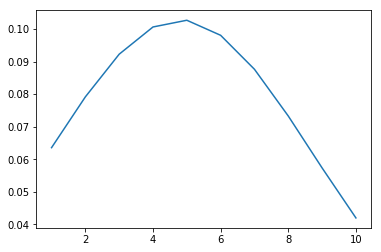

In [19]:
bmean = df_cancer['Bare Nuclei'].mean()
bstd = df_cancer['Bare Nuclei'].std()
b = df_cancer['Bare Nuclei'].sort_values(ascending=True)
plt.plot(b, stats.norm.pdf(b, bmean, bstd))
plt.show()

In [20]:
df_cancer[df_cancer['Bare Nuclei'].isna() == True]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,4
40,6,6,6,9,6,NaN,7,8,1,2
139,1,1,1,1,1,NaN,2,1,1,2
145,1,1,3,1,2,NaN,2,1,1,2
158,1,1,2,1,3,NaN,1,1,1,2
164,5,1,1,1,2,NaN,3,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
249,3,1,1,1,2,NaN,3,1,1,2
275,3,1,3,1,2,NaN,2,1,1,2
292,8,8,8,1,2,NaN,6,10,1,4


In [21]:
nan_value_indexes = df_cancer[df_cancer['Bare Nuclei'].isna() == True].index
nan_value_indexes

Int64Index([23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315,
            617],
           dtype='int64')

In [22]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.NAN,strategy='median')

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
imputer.fit(X=df_cancer[['Bare Nuclei']])

Imputer(axis=0, copy=True, missing_values=nan, strategy='median', verbose=0)

In [24]:
df_cancer['Bare Nuclei'] = imputer.transform(df_cancer[['Bare Nuclei']])

In [25]:
df_cancer[df_cancer['Bare Nuclei'].isna() == True].shape

(0, 10)

In [26]:
df_cancer.shape

(463, 10)

In [27]:
df_cancer[df_cancer.index.isin(nan_value_indexes)]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,3.0,7,3,1,4
40,6,6,6,9,6,3.0,7,8,1,2
139,1,1,1,1,1,3.0,2,1,1,2
145,1,1,3,1,2,3.0,2,1,1,2
158,1,1,2,1,3,3.0,1,1,1,2
164,5,1,1,1,2,3.0,3,1,1,2
235,3,1,4,1,2,3.0,3,1,1,2
249,3,1,1,1,2,3.0,3,1,1,2
275,3,1,3,1,2,3.0,2,1,1,2
292,8,8,8,1,2,3.0,6,10,1,4


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [28]:
# Check for correlation of variable
df_cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.578156,0.588956,0.383573,0.432165,0.507318,0.496158,0.450853,0.296797,0.675748
Cell Size,0.578156,1.000000,0.877404,0.640096,0.689982,0.588370,0.712986,0.657170,0.403911,0.757623
Cell Shape,0.588956,0.877404,1.000000,0.612415,0.649388,0.615732,0.687331,0.654724,0.381645,0.757932
Marginal Adhesion,0.383573,0.640096,0.612415,1.000000,0.528163,0.588980,0.611294,0.514134,0.358434,0.622371
Single Epithelial Cell Size,0.432165,0.689982,0.649388,0.528163,1.000000,0.480300,0.554625,0.558757,0.434875,0.604709
Bare Nuclei,0.507318,0.588370,0.615732,0.588980,0.480300,1.000000,0.604511,0.473021,0.263276,0.756155
Normal Nucleoli,0.496158,0.712986,0.687331,0.611294,0.554625,0.604511,1.000000,0.607259,0.279795,0.707166
Bland Chromatin,0.450853,0.657170,0.654724,0.514134,0.558757,0.473021,0.607259,1.000000,0.369716,0.639909
Mitoses,0.296797,0.403911,0.381645,0.358434,0.434875,0.263276,0.279795,0.369716,1.000000,0.360433
Class,0.675748,0.757623,0.757932,0.622371,0.604709,0.756155,0.707166,0.639909,0.360433,1.000000


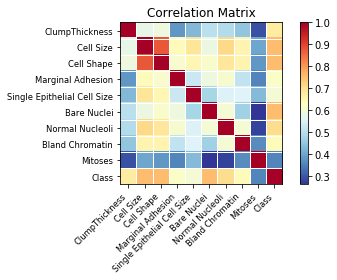

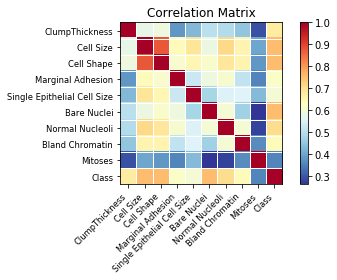

In [29]:
import statsmodels.graphics.api as smg
smg.plot_corr(df_cancer.corr(),xnames=list(df_cancer.corr().columns))

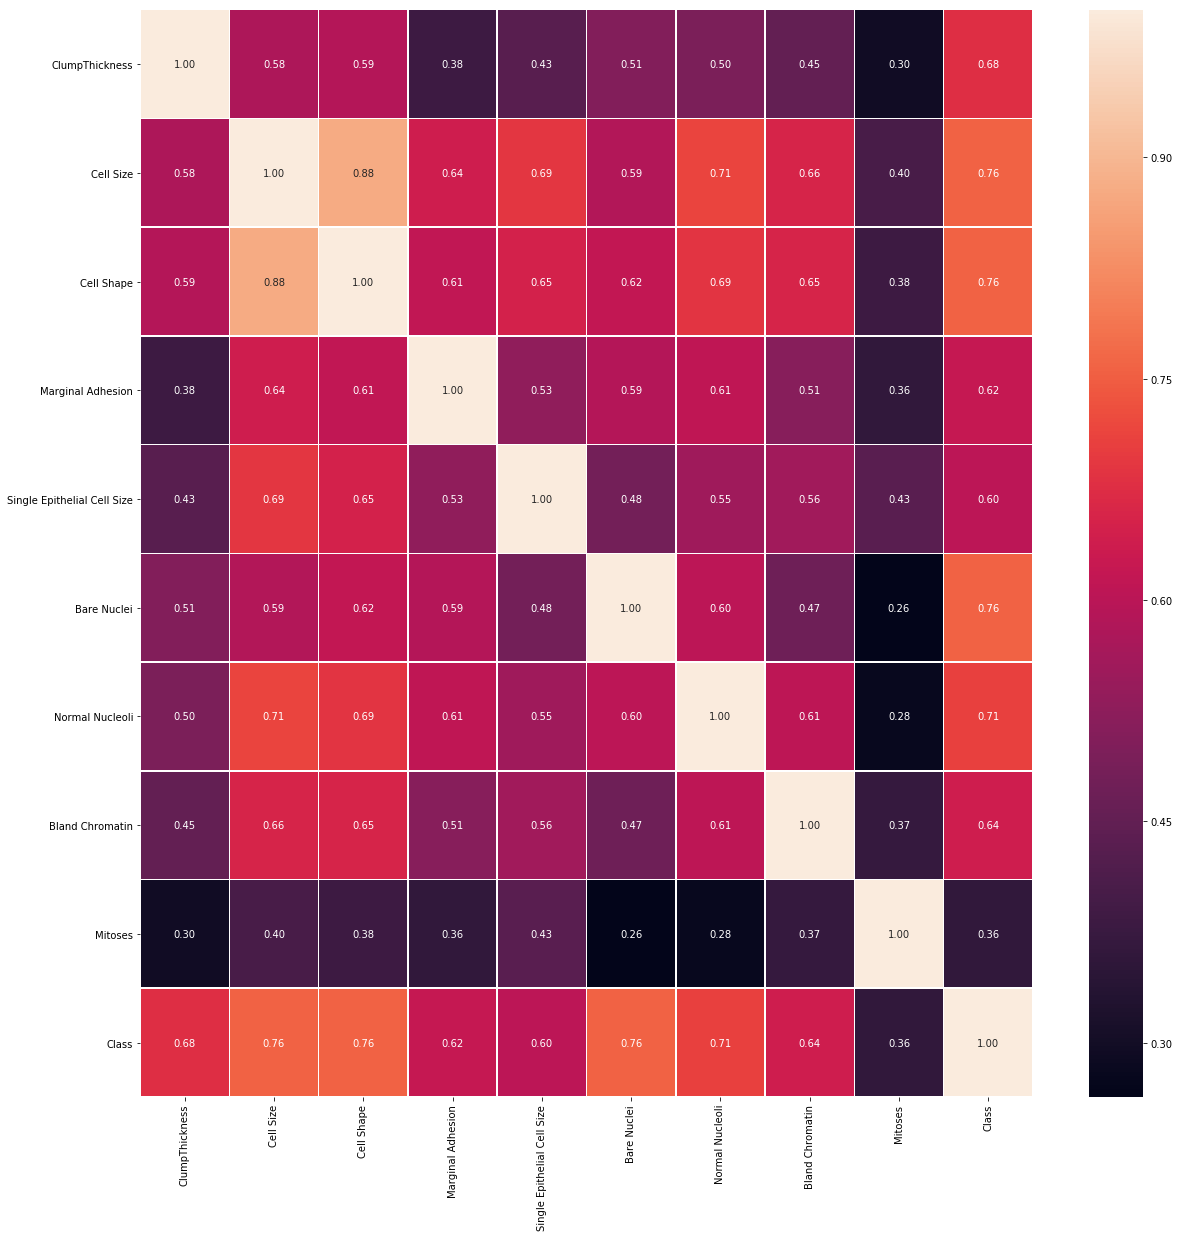

In [30]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df_cancer.corr(),annot=True,fmt='0.2f',linewidths=.5, ax=ax)

In [31]:
corr_df = df_cancer.corr()

In [32]:
corr_df[abs(corr_df) > (0.75)]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cell Size,NaN,1.000000,0.877404,NaN,NaN,NaN,NaN,NaN,NaN,0.757623
Cell Shape,NaN,0.877404,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.757932
Marginal Adhesion,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Single Epithelial Cell Size,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Bare Nuclei,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.756155
Normal Nucleoli,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Bland Chromatin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Mitoses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Class,NaN,0.757623,0.757932,NaN,NaN,0.756155,NaN,NaN,NaN,1.000000


In [33]:
corr_df[abs(corr_df) < 0.25]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cell Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cell Shape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marginal Adhesion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Single Epithelial Cell Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bare Nuclei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bland Chromatin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mitoses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

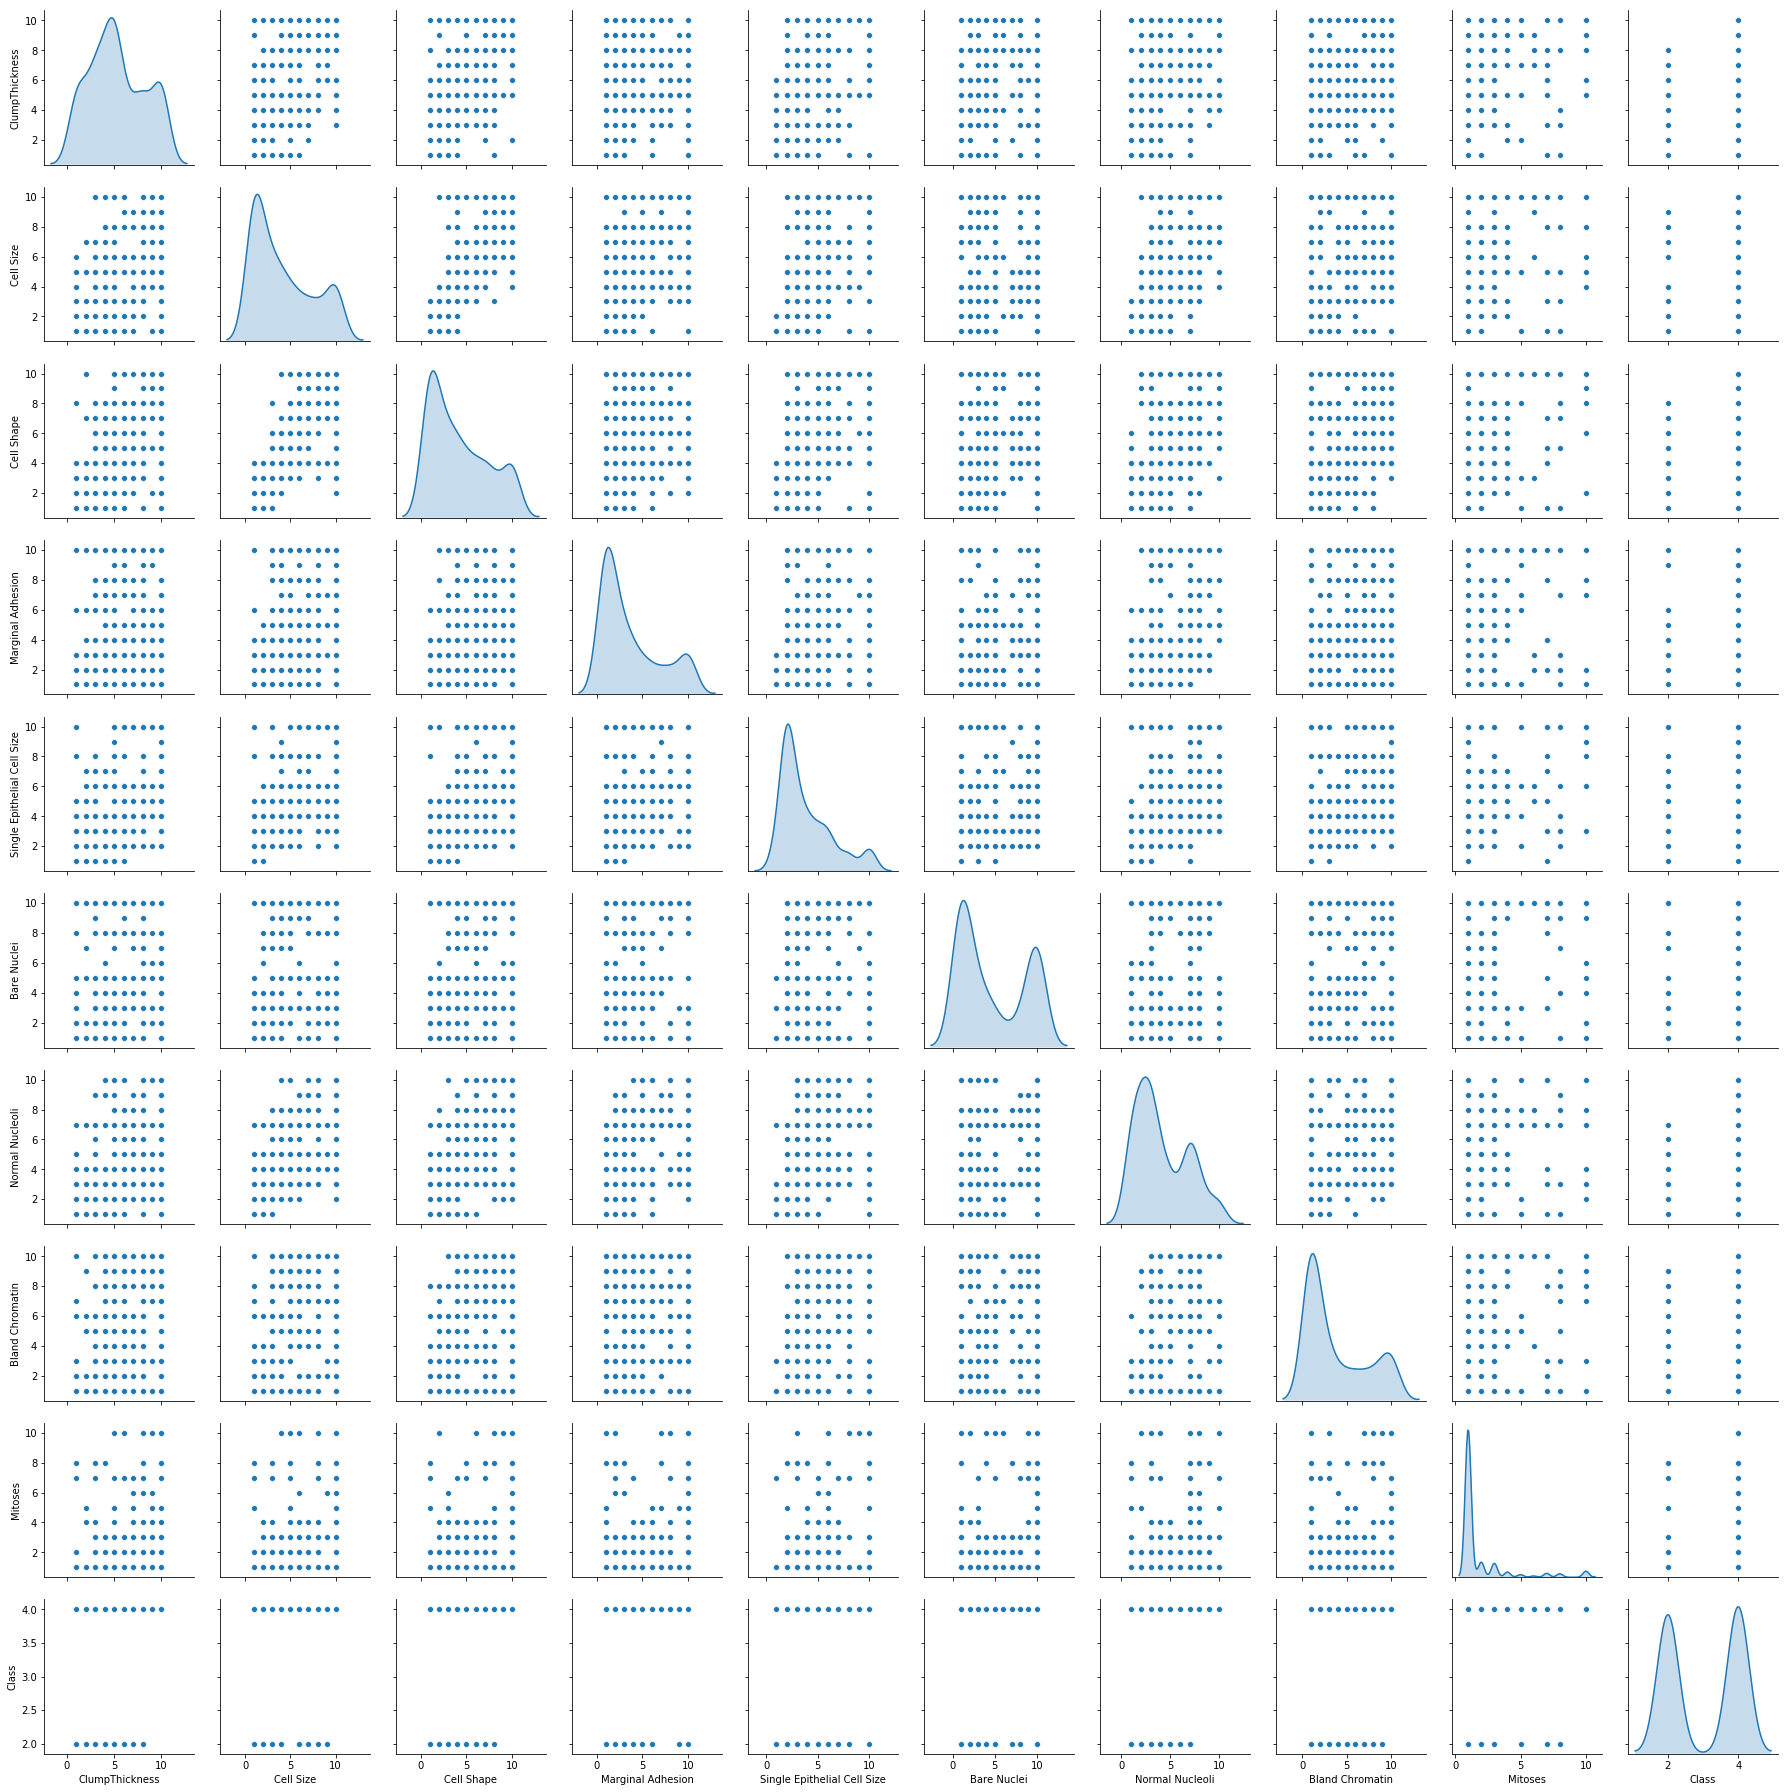

In [35]:
sns.pairplot(df_cancer, diag_kind='kde')

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


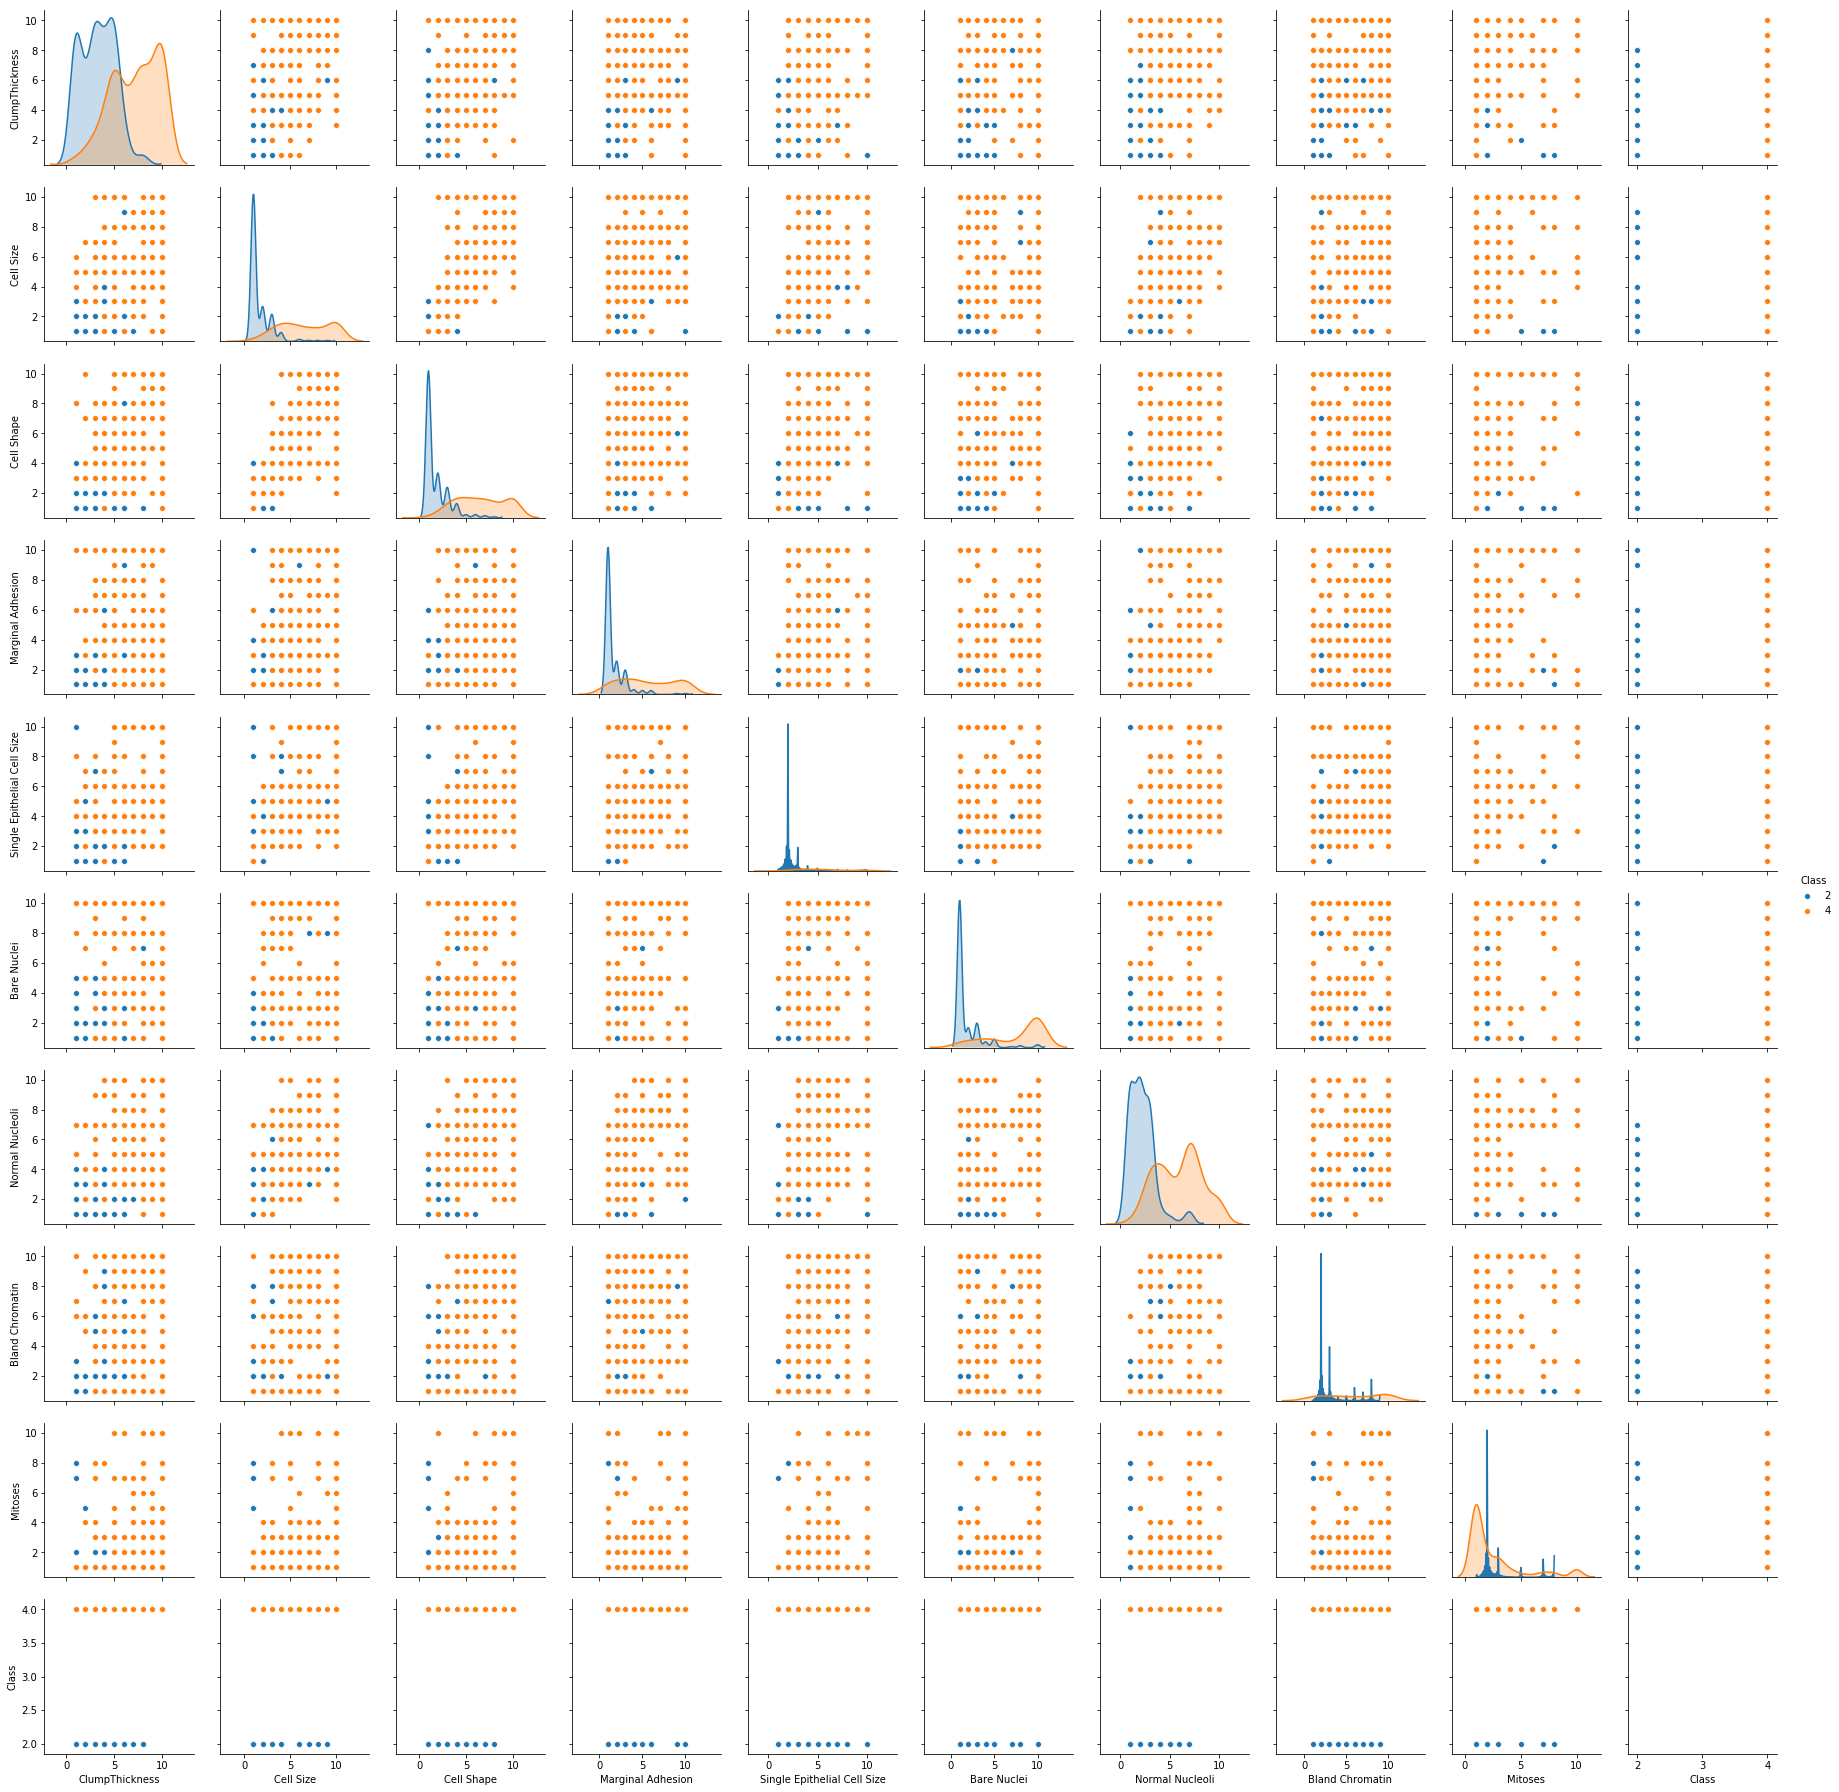

In [36]:
#Let us check for pair plots
sns.pairplot(df_cancer, diag_kind='kde',hue='Class')

In [37]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

**Observation**
- All values are discrete in nature
- Class 2 & Class 4 has a lot of covariance and is sparsely concentrated. 
- Features Mitoses and Single Epithelial Cell Size have low correlation with the the target class
- Also, features Cell Size is highly correlated with multiple other features
- Outliers of class 2 needs to be checked and removed

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [38]:
df_cancer.shape

(463, 10)

In [39]:
df_cancer.quantile()

ClumpThickness                 5.0
Cell Size                      3.0
Cell Shape                     3.0
Marginal Adhesion              2.0
Single Epithelial Cell Size    3.0
Bare Nuclei                    3.0
Normal Nucleoli                3.0
Bland Chromatin                2.0
Mitoses                        1.0
Class                          4.0
Name: 0.5, dtype: float64

In [40]:
outliers_removed_df = df_cancer[(df_cancer > (df_cancer.quantile(0.25) - 1.5*stats.iqr(df_cancer))) &  (df_cancer < (df_cancer.quantile(0.75) + 1.5*stats.iqr(df_cancer)))].dropna()

In [41]:
outliers_removed_df.shape

(449, 10)

**Observation**
- Removing outliers from the data, as we will not loose a lot of data
- Since the data is in same units, applying z-score can be avoided

In [42]:
df_cancer = outliers_removed_df

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X = df_cancer.drop('Class', axis = 1)
y = df_cancer['Class']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
linR = LinearRegression()

In [45]:
sfs_forward = SequentialFeatureSelector(linR, k_features=9, forward=True, scoring='r2', cv=5)
sfs_forward = sfs_forward.fit(x_train.values, y_train.values)
sfs_forward.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.68127732, 0.59680375, 0.59815065, 0.43908773, 0.60123866]),
  'avg_score': 0.5833116213446992,
  'feature_names': ('5',),
  'ci_bound': 0.1014019142983564,
  'std_dev': 0.07889413428042813,
  'std_err': 0.039447067140214065},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.81679781, 0.82480192, 0.70018632, 0.60655968, 0.70274051]),
  'avg_score': 0.7302172490179372,
  'feature_names': ('1', '5'),
  'ci_bound': 0.10503347755086268,
  'std_dev': 0.08171961386701757,
  'std_err': 0.04085980693350878},
 3: {'feature_idx': (0, 1, 5),
  'cv_scores': array([0.83284901, 0.82704911, 0.75627423, 0.66465399, 0.74810595]),
  'avg_score': 0.765786457823473,
  'feature_names': ('0', '1', '5'),
  'ci_bound': 0.07898289511484287,
  'std_dev': 0.061451375707888244,
  'std_err': 0.030725687853944122},
 4: {'feature_idx': (0, 1, 5, 7),
  'cv_scores': array([0.84228499, 0.85423023, 0.76701523, 0.69465218, 0.76399394]),
  'avg_score': 0.7844353147642299

In [46]:
sfs_backward = SequentialFeatureSelector(linR, k_features=9, forward=False, scoring='r2', cv=5)
sfs_backward = sfs_backward.fit(x_train.values, y_train.values)
sfs_backward.get_metric_dict()

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.84749883, 0.84069117, 0.76067694, 0.70376439, 0.77781707]),
  'avg_score': 0.7860896815898164,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8'),
  'ci_bound': 0.06860156042776515,
  'std_dev': 0.05337434463328208,
  'std_err': 0.02668717231664104}}

In [47]:
sfs_mix = SequentialFeatureSelector(linR, k_features=9, forward=True, scoring='r2', cv=5, floating=True)
sfs_mix = sfs_mix.fit(x_train.values, y_train.values)
sfs_mix.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.68127732, 0.59680375, 0.59815065, 0.43908773, 0.60123866]),
  'avg_score': 0.5833116213446992,
  'feature_names': ('5',),
  'ci_bound': 0.1014019142983564,
  'std_dev': 0.07889413428042813,
  'std_err': 0.039447067140214065},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.81679781, 0.82480192, 0.70018632, 0.60655968, 0.70274051]),
  'avg_score': 0.7302172490179372,
  'feature_names': ('1', '5'),
  'ci_bound': 0.10503347755086268,
  'std_dev': 0.08171961386701757,
  'std_err': 0.04085980693350878},
 3: {'feature_idx': (0, 1, 5),
  'cv_scores': array([0.83284901, 0.82704911, 0.75627423, 0.66465399, 0.74810595]),
  'avg_score': 0.765786457823473,
  'feature_names': ('0', '1', '5'),
  'ci_bound': 0.07898289511484287,
  'std_dev': 0.061451375707888244,
  'std_err': 0.030725687853944122},
 4: {'feature_idx': (0, 1, 5, 7),
  'cv_scores': array([0.84228499, 0.85423023, 0.76701523, 0.69465218, 0.76399394]),
  'avg_score': 0.7844353147642299

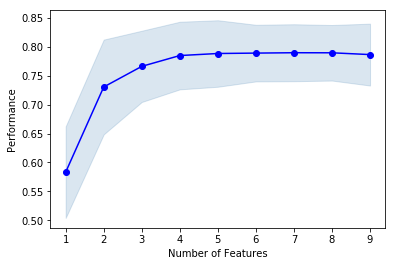

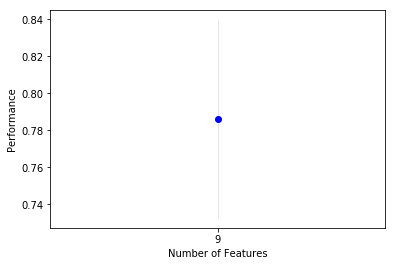

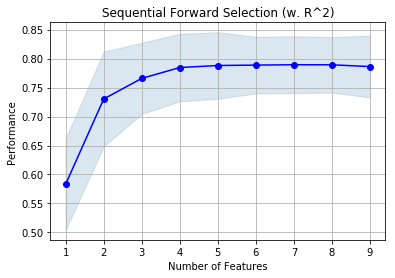

In [48]:
fig = plot_sfs(sfs_forward.get_metric_dict())
fig = plot_sfs(sfs_backward.get_metric_dict())
fig = plot_sfs(sfs_mix.get_metric_dict())
plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [49]:
filter_indices = [0,1,2,5,6,7]
np.array(x_train.columns)[filter_indices]

array(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Bare Nuclei',
       'Normal Nucleoli', 'Bland Chromatin'], dtype=object)

**Observation**
- Using Sequential Feature Selection, features 0,1,2,5,6,7 based on forward and mix selection namely ['ClumpThickness', 'Cell Size','Cell Shape', 'Bare Nuclei','Normal Nucleoli', 'Bland Chromatin'] seem to be the most important features

# Q6 Create a covariance matrix for identifying Principal components

In [50]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
#Printing cov_matrix in Pandas dataframe to view clearly
pd.DataFrame(cov_matrix, columns=X.columns, index=X.columns)

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
ClumpThickness,1.002232,0.575649,0.583719,0.374172,0.420945,0.508223,0.506681,0.443263,0.243424
Cell Size,0.575649,1.002232,0.881272,0.632244,0.670027,0.598703,0.720385,0.638264,0.339977
Cell Shape,0.583719,0.881272,1.002232,0.602173,0.637999,0.621196,0.700089,0.643888,0.335047
Marginal Adhesion,0.374172,0.632244,0.602173,1.002232,0.517936,0.602299,0.606285,0.504879,0.330053
Single Epithelial Cell Size,0.420945,0.670027,0.637999,0.517936,1.002232,0.493843,0.560335,0.524035,0.325375
Bare Nuclei,0.508223,0.598703,0.621196,0.602299,0.493843,1.002232,0.618675,0.468340,0.295771
Normal Nucleoli,0.506681,0.720385,0.700089,0.606285,0.560335,0.618675,1.002232,0.607689,0.284099
Bland Chromatin,0.443263,0.638264,0.643888,0.504879,0.524035,0.468340,0.607689,1.002232,0.300566
Mitoses,0.243424,0.339977,0.335047,0.330053,0.325375,0.295771,0.284099,0.300566,1.002232


# Q7 Identify eigen values and eigen vector

In [51]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [52]:
pd.DataFrame(eigenvalues, columns=['Eigen Values']).T

,0,1,2,3,4,5,6,7,8
Eigen Values,5.283891,0.840595,0.116274,0.643893,0.597357,0.486175,0.317169,0.358422,0.376313


In [53]:
pd.DataFrame(eigenvectors, index=X.columns)

,0,1,2,3,4,5,6,7,8
ClumpThickness,0.294836,0.198236,-0.006546,0.828233,0.095764,0.033800,-0.188174,-0.376214,0.022420
Cell Size,0.392431,0.094336,0.728543,-0.012435,-0.179809,0.110369,0.257983,0.176440,0.404933
Cell Shape,0.389116,0.106244,-0.672552,0.040535,-0.158705,0.058205,0.413228,0.241153,0.354745
Marginal Adhesion,0.330546,-0.065721,-0.059388,-0.458229,0.421953,-0.059537,-0.084384,-0.620280,0.315376
Single Epithelial Cell Size,0.329539,-0.043486,-0.054115,-0.196858,-0.363989,0.711481,-0.182123,-0.157894,-0.388638
Bare Nuclei,0.332897,0.068869,0.077133,0.004229,0.635403,0.035043,0.335938,0.270040,-0.536402
Normal Nucleoli,0.362426,0.142349,-0.058453,-0.118488,0.066174,-0.209035,-0.743963,0.473621,0.071098
Bland Chromatin,0.328670,0.043513,0.032156,-0.108910,-0.463270,-0.651708,0.139654,-0.230374,-0.406535
Mitoses,0.199010,-0.952578,0.000653,0.193875,0.006591,-0.062390,-0.033895,0.095857,0.033590


# Q8 Find variance and cumulative variance by each eigen vector

In [54]:
# Variance
variance = pd.DataFrame(eigenvalues, columns=['Variance of Eigen Vector']).T
variance = variance/eigenvalues.sum()
variance = variance.sort_values(axis=1, by='Variance of Eigen Vector', ascending=False)
variance

,0,1,3,4,5,8,7,6,2
Variance of Eigen Vector,0.585791,0.093191,0.071384,0.066225,0.053899,0.041719,0.039736,0.035162,0.012891


In [55]:
# Cumulative Variance
variance.loc['Cumulative Variance of Eigen Vector'] = [n for n in variance.loc['Variance of Eigen Vector'].cumsum()]
variance

,0,1,3,4,5,8,7,6,2
Variance of Eigen Vector,0.585791,0.093191,0.071384,0.066225,0.053899,0.041719,0.039736,0.035162,0.012891
Cumulative Variance of Eigen Vector,0.585791,0.678983,0.750367,0.816592,0.870492,0.912211,0.951947,0.987109,1.000000


[Text(0.2, 0.5857914821590471, '0.5858'),
 Text(1.2, 0.6789828589576749, '0.6790'),
 Text(2.2, 0.7503671760631265, '0.7504'),
 Text(3.2, 0.8165923427949235, '0.8166'),
 Text(4.2, 0.8704915054667781, '0.8705'),
 Text(5.2, 0.9122109304048159, '0.9122'),
 Text(6.2, 0.9519469337407237, '0.9519'),
 Text(7.2, 0.9871094033156906, '0.9871'),
 Text(8.2, 0.9999999999999998, '1.0000')]

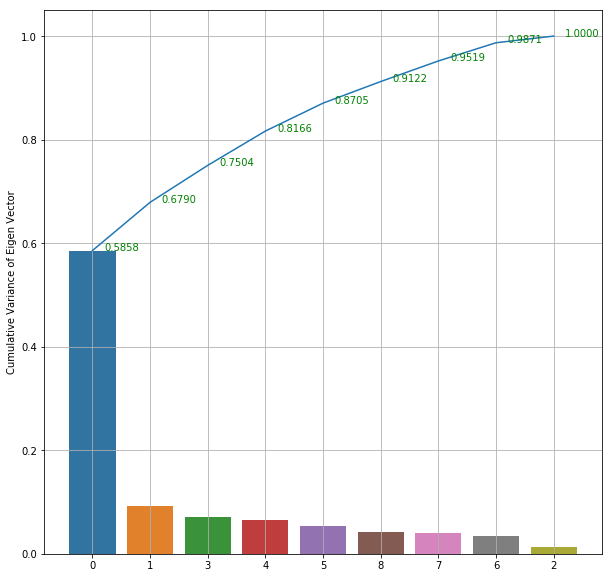

In [56]:
# Plotting variance and cumulative variance by each eigen vector
plt.figure(figsize=(10,10))
sns.barplot(x = variance.columns, y = variance.loc['Variance of Eigen Vector'], order=[0, 1, 3, 4, 5, 8, 7, 6, 2])
ax = sns.lineplot(x = variance.columns.sort_values(), y = variance.loc['Cumulative Variance of Eigen Vector'])
plt.grid(axis='both')
[ax.text(p[0]+0.20, p[1], '{0:.4f}'.format(p[1]), color='g') for p in zip(ax.get_xticks(), variance.loc['Cumulative Variance of Eigen Vector'])]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=3)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
pca.explained_variance_

array([5.28389147, 0.84059454, 0.64389291])

In [60]:
pca.explained_variance_ratio_

array([0.58579148, 0.09319138, 0.07138432])

In [61]:
X_pca = pca.transform(X_std)
X_pca.shape

(449, 3)

In [62]:
pd.DataFrame(X_pca).head(10)

,0,1,2
0,-2.145017,-0.117687,-0.484318
1,0.631143,-0.307772,0.530324
2,-2.265130,0.003592,0.096518
3,0.718998,-0.754077,-0.561661
4,-2.033440,-0.005265,0.104921
5,4.103111,-1.232895,0.485484
6,-1.775912,-0.001187,0.669613
7,-2.328190,0.056412,0.375306
8,-2.193784,2.781426,-0.227418
9,-2.263306,-0.023381,-0.234748


# Q10 Find correlation between components and features

In [63]:
pd.DataFrame(pca.components_, columns=X.columns)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.294836,0.392431,0.389116,0.330546,0.329539,0.332897,0.362426,0.328670,0.199010
1,-0.198236,-0.094336,-0.106244,0.065721,0.043486,-0.068869,-0.142349,-0.043513,0.952578
2,-0.828233,0.012435,-0.040535,0.458229,0.196858,-0.004229,0.118488,0.108910,-0.193875


# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

In [64]:
df_movies = pd.read_csv('movies_metadata.csv', na_values='99')
df_movies.head()

c:\users\sumug\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [65]:
df_movies.shape

(45466, 24)

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [66]:
df_movies['description'] = df_movies['overview'] + ' ' if not (df_movies['overview'].empty or df_movies['tagline'].empty) else '' + df_movies['tagline']
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'description'],
      dtype='object')

# Q13  Lets drop the null values in `description` column

In [67]:
df_movies.shape

(45466, 25)

In [68]:
df_movies['description'].isnull().any()

True

In [69]:
df_movies.dropna(axis=0, subset=['description'], inplace=True)

In [70]:
df_movies['description'].isnull().any()

False

In [71]:
df_movies.shape

(44512, 25)

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [72]:
df_movies = df_movies[~df_movies.duplicated(subset='title', keep='first')]
df_movies.shape

(41371, 25)

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [73]:
df_movies.iloc[:5,:5]

,adult,belongs_to_collection,budget,genres,homepage
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN


In [74]:
df_movies.reset_index(drop=True,inplace=True)
df_movies.iloc[:5,:5]

,adult,belongs_to_collection,budget,genres,homepage
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN


# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

In [75]:
df_movies[['title','description']].head(10)

,title,description
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
5,Heat,"Obsessive master thief, Neil McCauley leads a ..."
6,Sabrina,An ugly duckling having undergone a remarkable...
7,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses..."
8,Sudden Death,International action superstar Jean Claude Van...
9,GoldenEye,James Bond must unmask the mysterious head of ...


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(analyzer='word',ngram_range=(1,3),stop_words='english', min_df = 0)

In [77]:
vect.fit(df_movies['description'])
description_matrix = vect.transform(df_movies["description"])

In [78]:
description_matrix.shape

(41371, 2104498)

In [79]:
features = vect.get_feature_names()
features[:10]

['00',
 '00 agent',
 '00 agent dead',
 '00 body',
 '00 body vanish',
 '00 editor',
 '00 editor jabez',
 '00 foot',
 '00 foot tall',
 '00 furnish']

In [80]:
len(features)

2104498

# Q17  Create cosine similarity matrix

In [81]:
from sklearn.metrics.pairwise import cosine_similarity

In [82]:
# Getting some memory error - hence not doing this optional part. 
cosine_sim = cosine_similarity(description_matrix, description_matrix)

MemoryError: 

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [83]:
df_jokes = pd.read_csv('jokes.csv', na_values='99')
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [84]:
df_jokes.shape

(24983, 101)

In [85]:
ratings = df_jokes.iloc[:200,1:]
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [86]:
ratings.columns = np.arange(0,100,1)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [87]:
ratings.replace(np.NAN, 0, inplace=True)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [88]:
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)      
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [89]:
print("Top 10 joke IDs with their means")
pd.DataFrame(ratings_diff).describe().T[['mean']].sort_values(by='mean', ascending=False).head(10)

Top 10 joke IDs with their means


,mean
53,1.154632e-16
20,1.110223e-16
47,7.771561e-17
64,7.105427e-17
49,7.105427e-17
99,5.773160e-17
83,4.440892e-17
73,4.440892e-17
23,4.440892e-17
13,3.552714e-17
